In [6]:
import mode_analyze
reload(mode_analyze)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
#Setting up models
model=mode_analyze.n3_poly()
ma_3=mode_analyze.ModeAnalyzer(model,'poly_3/poly3.n', n_min=-18, n_max=10, ls=[2,3])

model=mode_analyze.n32_poly()
ma_32=mode_analyze.ModeAnalyzer(model,'poly_32/poly32.n', n_min=0, n_max=10, ls=[2,3])


# MM='0.6'
# loc='/home/aleksey/Dropbox/'
# base=loc+'mesa_projects/{0}Msun/'.format(MM)
# prof=mode_analyze.prep_mesa(base)

# ma_32=mode_analyze.ModeAnalyzer(prof, '/home/aleksey/Dropbox/gyre_work/{0}Msun.n'.format(MM), 0, 10, [2])


# MM='1'
# loc='/home/aleksey/Dropbox/'
# base=loc+'mesa_projects/{0}Msun/'.format(MM)
# prof=mode_analyze.prep_mesa(base)

# ma_3=mode_analyze.ModeAnalyzer(prof, '/home/aleksey/Dropbox/gyre_work/1Msun/{0}Msun.n'.format(MM), -129, 10, [2])



In [54]:
ns=range(-18, 11)
ls=[2, 3]

for ll in ls:
    for nn in ns:
        tag=str(nn)+'_'+str(ll)
        mode=ma_3.modes_dict[tag]
        header='{0:d} {1:d} {2} {3}\nx xi_r xi_h'.format(nn, ll, mode['omega'], mode['Q'])  
        dat=np.transpose([mode['xs'], mode['xi_r'], mode['xi_h']])
        np.savetxt('mode_summary_n3/mode_'+tag, dat,header=header)
            

In [55]:
ns=range(0, 11)
ls=[2, 3]

for ll in ls:
    for nn in ns:
        tag=str(nn)+'_'+str(ll)
        mode=ma_32.modes_dict[tag]
        header='{0:d} {1:d} {2} {3}\nx xi_r xi_h'.format(nn, ll, mode['omega'], mode['Q'])  
        dat=np.transpose([mode['xs'], mode['xi_r'], mode['xi_h']])
        np.savetxt('mode_summary_n32/mode_'+tag, dat,header=header)

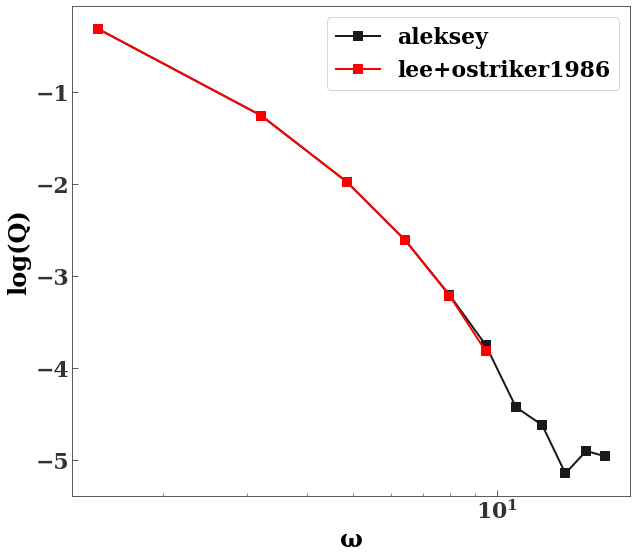

In [62]:
from astropy.table import Table

ns=range(0, 11)
ls=[2]
mode_summary_n32=np.empty([len(ns)*len(ls), 4])
fig,ax=plt.subplots(figsize=(10,9))
ax.set_xlabel(r'$\omega$')
ax.set_ylabel('log(Q)')
# ax.set_ylim(1.0e-8, 1.0)

Q1=ma_32.modes_dict['1_2']['Q']
omega_1=ma_32.modes_dict['1_2']['omega']

idx=0
for ll in ls:
    for nn in ns:
        mode=ma_32.modes_dict[str(nn)+'_'+str(ll)]
        mode_summary_n32[idx]=nn, ll, mode['omega'], mode['Q']
        idx+=1
 
compare=[0.4909, 0.05577, 0.01062, 0.002464, 6.154e-4, 1.543e-4]
mode_summary_n32=Table(mode_summary_n32)
#semilogy(mode_summary_n32['col0'],(mode_summary_n32['col2']/omega_1)**(17./6.)*Q1, '--')
#semilogy(mode_summary_n32['col0'],np.exp(-0.95*(mode_summary_n32['col2']-omega_2))*Q2, '--')
semilogx(mode_summary_n32['col2'],log10(np.abs(mode_summary_n32['col3'])), 's-', label='aleksey')
semilogx(mode_summary_n32['col2'][:6], log10(np.abs(compare)), 'rs-', label='lee+ostriker1986')
ax.legend()

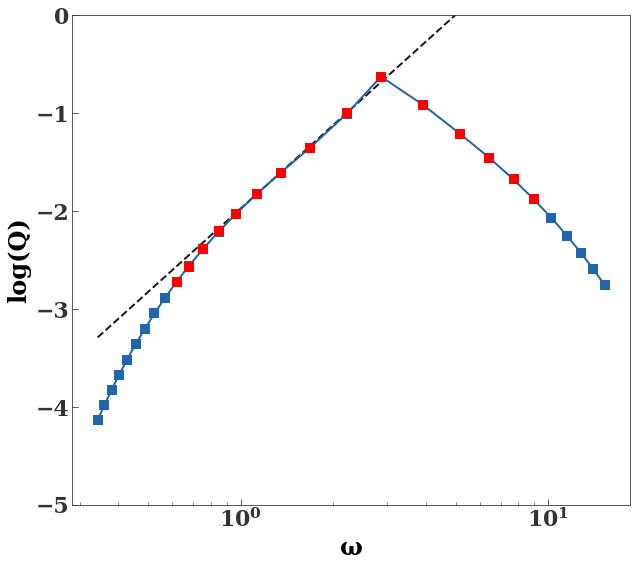

In [50]:
from astropy.table import Table

ns=range(-18, 11)
ns=np.array(ns)
ls=[2]
mode_summary_n3=np.empty([len(ns)*len(ls), 4])
fig,ax=plt.subplots(figsize=(10,9))
ax.set_ylim(-5, 0)
ax.set_xlabel(r'$\omega$')
ax.set_ylabel('log(Q)')

idx=0
Q1=ma_3.modes_dict['-4_2']['Q']
omega_1=ma_3.modes_dict['-4_2']['omega']



for ll in ls:
    for nn in ns:
        mode=ma_3.modes_dict[str(nn)+'_'+str(ll)]
        mode_summary_n3[idx]=nn, ll, mode['omega'], mode['Q']
        idx+=1
 
compare=[1.894e-3, 2.7e-3, 4.121e-3, 6.263e-3, 9.442e-3, 1.492e-2, 2.470e-2, 
         4.457e-2, 9.955e-2, 0.2372, 0.1226, 0.06163, 0.03498, 0.0211, 0.01322]
compare=np.array(compare)
mode_summary_n3=Table(mode_summary_n3)
omegas=mode_summary_n3['col2']
semilogx((mode_summary_n3['col2']),log10((mode_summary_n3['col2']/omega_1)**(17./6.)*Q1), '--')
semilogx((mode_summary_n3['col2']),log10(mode_summary_n3['col3']), 's-', label='aleksey')
# semilogx(omegas[omegas<2.], compare)
#loglog(mode_summary_n3['col0'],np.exp(-0.95*(mode_summary_n3['col2']-omega_2)))
#semilogy(mode_summary_n3['col0'][mode_summary_n3['col0']<0],(mode_summary_n3['col2'][mode_summary_n3['col0']<0]/omega_1)**(17./6.)*Q1, 'r--', label=r'$Q\propto \omega^{17/6}$')
#loglog(mode_summary_n3['col0'],np.exp(omega_2-mode_summary_n3['col2'])*Q2, 'r--', label=r'exp')


semilogx(omegas[(ns>=-9) & (ns<=5)], log10(abs(compare)), 'rs', label='lee+ostriker1986')
# ax.legend()

In [82]:
##Tidal coupling constant
Ts_3=ma_3.tidal_coupling(2)
Ts_32=ma_32.tidal_coupling(2)

In [83]:
Ts_3_l3=ma_3.tidal_coupling(3)
Ts_32_l3=ma_32.tidal_coupling(3)

Populating the interactive namespace from numpy and matplotlib


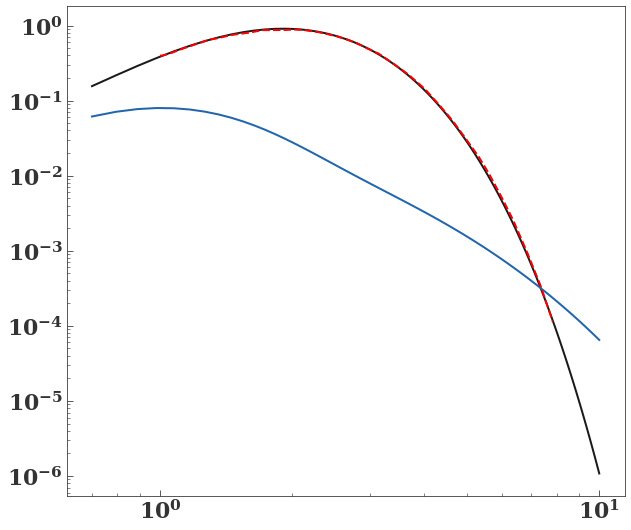

In [84]:
%pylab inline
fig,ax=plt.subplots(figsize=(10,9))

dat=np.genfromtxt('coupling_n32.csv',delimiter=',')
order=np.argsort(dat[:,0])

loglog(ma_32.etas, Ts_32)
loglog(ma_3.etas, Ts_3)
loglog(dat[:,0][order], dat[:,1][order], 'r--')


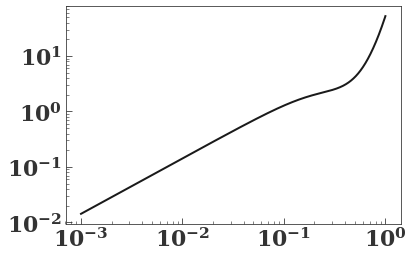

In [14]:
loglog(ma_3.modes_dict['0_2']['xs'], abs(ma_3.modes_dict['0_2']['xi_r']))

Populating the interactive namespace from numpy and matplotlib


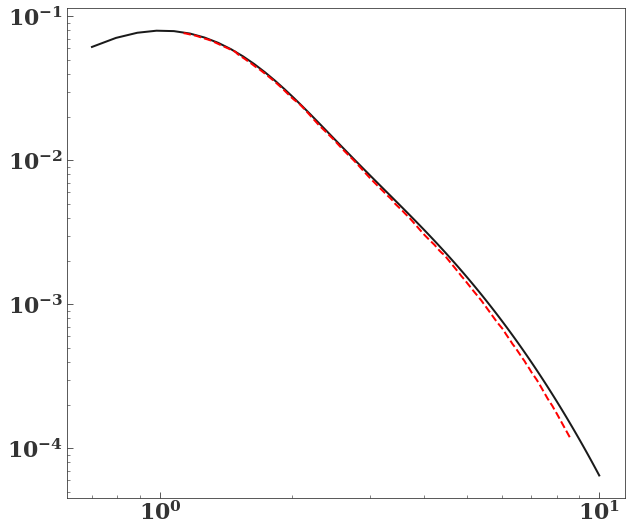

In [6]:
%pylab inline
fig,ax=plt.subplots(figsize=(10,9))

dat=np.genfromtxt('coupling_n3.csv',delimiter=',')
order=np.argsort(dat[:,0])

loglog(ma_3.etas, Ts_3)
loglog(dat[:,0][order], dat[:,1][order], 'r--')

In [87]:
from scipy.interpolate import interp1d

def phi(x):
    return 2.*np.arctan(x)

def t(x):
    return x+x**3./3.

xs=np.linspace(-1000, 1000, 100)
m=2.
l=2.
t1=t(xs)

tords=np.linspace(-1000, 1000, 500)
xords=interp1d(t1, xs)(tords)

out=np.fft.fft((1./(1+xords**2.))**(l+1.)*np.exp(phi(xords)*m*1.0j))